# 项目名称：客户购买品牌预测

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  
# warnings.filterwarnings("ignore")

## 1 查看数据结构

In [2]:
# 导入数据
df = pd.read_csv('data.csv')
df

,user_id,brand_id,type,visit_datetime
0,10944750,13451,0,6月4日
1,10944750,13451,2,6月4日
2,10944750,13451,2,6月4日
3,10944750,13451,0,6月4日
4,10944750,13451,0,6月4日
...,...,...,...,...
182875,847750,26631,0,7月30日
182876,847750,26631,0,7月30日
182877,847750,2845,0,8月12日
182878,847750,5317,0,8月8日


In [3]:
# 查看数据情况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182880 entries, 0 to 182879
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         182880 non-null  int64 
 1   brand_id        182880 non-null  int64 
 2   type            182880 non-null  int64 
 3   visit_datetime  182880 non-null  object
dtypes: int64(3), object(1)
memory usage: 5.6+ MB


In [4]:
# 查看缺失值
df.isnull().sum()

user_id           0
brand_id          0
type              0
visit_datetime    0
dtype: int64

In [5]:
# 查看数据重复值
df.duplicated().sum()

97850

In [6]:
df['user_id'].nunique()

884

In [7]:
df['brand_id'].nunique()

9531

In [8]:
df['visit_datetime'].nunique()

123

In [9]:
type_pl=df['type'].value_counts()
type_pl

type
0    174539
1      6984
2      1204
3       153
Name: count, dtype: int64

In [10]:
# 查看行为类型分布 
# ! pip install matplotlib ipywidgets
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.globals import CurrentConfig, NotebookType, OnlineHostType
#onlineHostType.NOTBBOOK_HOsT默认值为 http://localhost:8888/nbextensions/assets/
# 设置 Pyecharts 的在线资源主机为 NotebookHost  
CurrentConfig.ONLINE_HOST = OnlineHostType.NOTEBOOK_HOST   
# %matplotlib widget

# 配置对应的环境类型
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK
CurrentConfig.ONLINE_HOST='https://assets.pyecharts.org/assets/'

labels = ['点击', '购买', '收藏', '加购物车']
# data = [[174539], [6984], [1204], [153]]  

# pie = (
#     Pie(init_opts=opts.InitOpts(width="500px", height="300px"))
#     .add("", [list(z) for z in zip(labels, data)])
#     .set_colors(['#659AC3','#C46ECA','#D19E76','#86D880'])
#     .set_global_opts(
#         title_opts=opts.TitleOpts(title="行为类型占比"),
#         legend_opts=opts.LegendOpts(orient="vertical", pos_right="", pos_top="right")
#     )
#     .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"))
# )
# pie.render_notebook()  

data = [174539, 6984, 1204, 153]  # 直接使用数字列表  
  
pie = (  
    Pie(init_opts=opts.InitOpts(width="500px", height="300px"))  
    .add("", list(zip(labels, data)))  
    .set_colors(['#659AC3','#C46ECA','#D19E76','#86D880'])  
    .set_global_opts(  
        title_opts=opts.TitleOpts(title="行为类型占比"),  
        legend_opts=opts.LegendOpts(orient="vertical", pos_right="15%", pos_top="middle")  
    )  
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c} ({d}%)"))  
)  
# pie.render_notebook()
pie.render("output.html")

'C:\\Users\\Administrator\\客户购买品牌预测项目\\output.html'

行为类型占比分析：可以看出即点击的次数最多，占据了所有记录的 95.44%，购买占了所有记录的4%左右，收藏占了所有记录的0.66%，添加购物车占了所有记录的0.08%。这说明，在网购期间，绝大多数用户以浏览为主，即绝大多数人都喜欢在电商平台“闲逛”，虽然该行为只是浏览点击，但是也反映了该商品吸引了用户点击浏览。添加购物车的行为比点击更代表用户对商品感兴趣。因此项目数据集属于不均衡数据集。若以是否购买作为客户或品牌的分类标签，会导致数据的正负样本失衡，最终导致无法准确判断客户的购买行为，可能需要利用欠采样技术来解决这一问题。

## 2 数据预处理

数据预处理 (Data preprocessing) 是指在进行数据分析之前，对原始数据进行清洗、转换和集成等一系列处理，以便于进行更高效、准确的数据分析。

该项目需要做的数据预处理内容包括：数据清洗（检测和纠正数据中的异常值、缺失值、重复值和错误值等）与数据准备（数据整理排序）

### 2.1 数据清洗

In [11]:
df

,user_id,brand_id,type,visit_datetime
0,10944750,13451,0,6月4日
1,10944750,13451,2,6月4日
2,10944750,13451,2,6月4日
3,10944750,13451,0,6月4日
4,10944750,13451,0,6月4日
...,...,...,...,...
182875,847750,26631,0,7月30日
182876,847750,26631,0,7月30日
182877,847750,2845,0,8月12日
182878,847750,5317,0,8月8日


In [12]:
# 查看数据情况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182880 entries, 0 to 182879
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         182880 non-null  int64 
 1   brand_id        182880 non-null  int64 
 2   type            182880 non-null  int64 
 3   visit_datetime  182880 non-null  object
dtypes: int64(3), object(1)
memory usage: 5.6+ MB


数据情况：
* 无异常值、缺失值。
* 重复值处理说明：在客户购买品牌行为的数据中，重复值代表了同一观测的多个测量结果，删除重复值可能会导致数据的丢失。因此对于数据重复值不做删除处理。

### 2.2 数据整理

数据整理：需要先将为数字格式的id、行为类型的格式转换为字符格式，更符合现实意义；行为时间需要转换为日期格式。

In [13]:
# 将为数字格式的数据的格式转换为字符格式
df = df.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182880 entries, 0 to 182879
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         182880 non-null  object
 1   brand_id        182880 non-null  object
 2   type            182880 non-null  object
 3   visit_datetime  182880 non-null  object
dtypes: object(4)
memory usage: 5.6+ MB


In [14]:
# 对行为时间列进行日期格式转换
# 假设这是一年内的数据，因此转换时间格式时，年份为默认年份1900
import datetime

df['visit_datetime'] = pd.to_datetime(df['visit_datetime'], format='%m月%d日')
df

,user_id,brand_id,type,visit_datetime
0,10944750,13451,0,1900-06-04
1,10944750,13451,2,1900-06-04
2,10944750,13451,2,1900-06-04
3,10944750,13451,0,1900-06-04
4,10944750,13451,0,1900-06-04
...,...,...,...,...
182875,847750,26631,0,1900-07-30
182876,847750,26631,0,1900-07-30
182877,847750,2845,0,1900-08-12
182878,847750,5317,0,1900-08-08


数据排序：数据按时间列进行排序，以便后面构建与事件相关的新数据指标 

In [15]:
# 数据按时间列进行排序
df.sort_values('visit_datetime', inplace=True)
df

,user_id,brand_id,type,visit_datetime
53046,10492250,3228,0,1900-04-15
158705,5011500,20484,0,1900-04-15
158704,5011500,20484,0,1900-04-15
88093,7797000,14294,0,1900-04-15
158703,5011500,20484,0,1900-04-15
...,...,...,...,...
28533,3226500,16474,0,1900-08-15
28532,3226500,16474,0,1900-08-15
28531,3226500,14071,0,1900-08-15
128575,11939000,21672,0,1900-08-15


## 3 数据探索性分析

进行探索性数据分析，目的是发现数据中的模式、趋势、异常值和关联关系，以帮助理解数据的特征和可用性。

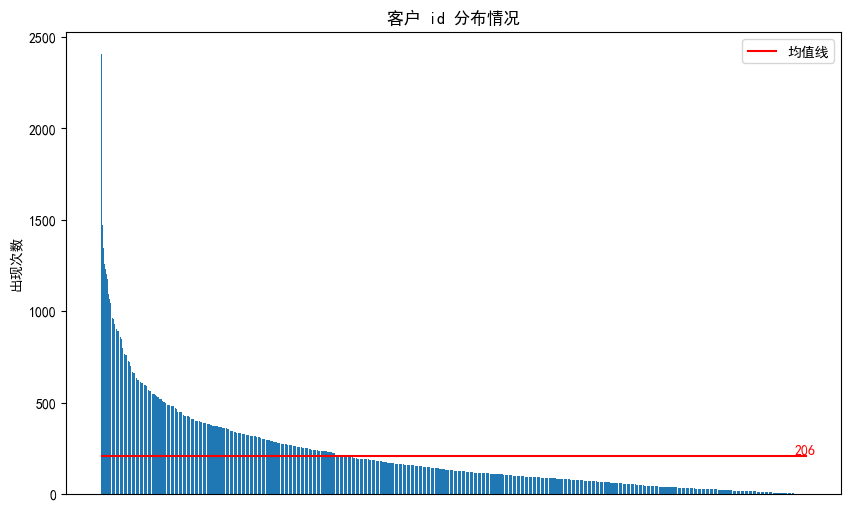

In [16]:
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
# 统计每个字符出现的次数  
user_counts = df["user_id"].value_counts()
# 计算中位数  
mean_count = np.mean(user_counts.values)
# 绘制字符数量分布直方图  
plt.figure(figsize=(10, 6))  
plt.bar(user_counts.index, user_counts.values)  
plt.xlabel("客户 id")  
plt.ylabel("出现次数")  
plt.title("客户 id 分布情况")
# 绘制中位线
plt.plot(user_counts.index, [mean_count] * len(user_counts.index), color='red', linestyle='-', label='均值线')
plt.annotate(f'{int(mean_count)}', (user_counts.index[-1], mean_count), fontsize=10, color='red', ha='center', va='bottom')
plt.legend()
# 获取当前图形的 x 轴  
xaxis = plt.gca().xaxis
# 隐藏 x 轴  
xaxis.set_visible(False)
# 绘制中位线  
plt.show()  

客户id出现次数分布不均，极少数客户id出现次数过多，接近2500次，而出现次数的平均数仅为206次

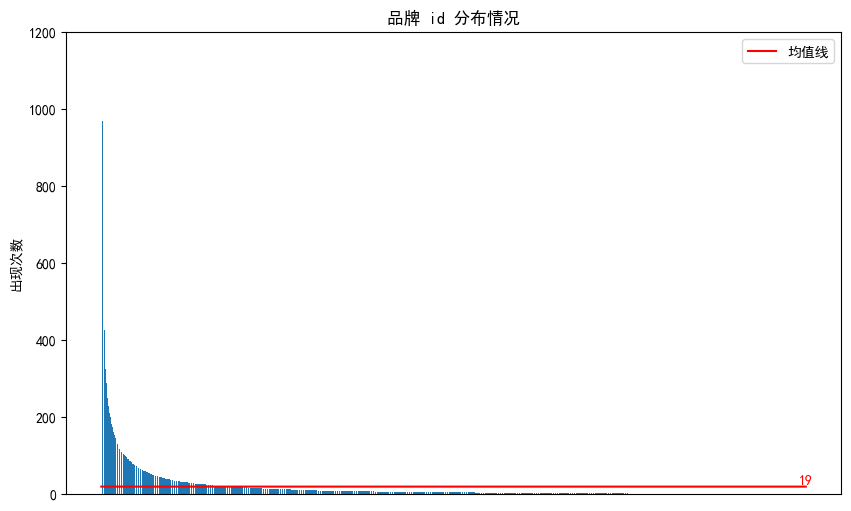

In [17]:
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
# 统计每个字符出现的次数  
brand_counts = df["brand_id"].value_counts()  
# 计算中位数  
mean_count = np.mean(brand_counts.values)
# 绘制字符数量分布直方图  
plt.figure(figsize=(10, 6))  
plt.bar(brand_counts.index, brand_counts.values)  
plt.xlabel("品牌 id")  
plt.ylabel("出现次数")  
plt.title("品牌 id 分布情况")
# 绘制中位线
plt.plot(brand_counts.index, [mean_count] * len(brand_counts.index), color='red', linestyle='-', label='均值线')
plt.annotate(f'{int(mean_count)}', (brand_counts.index[-1], mean_count), fontsize=10, color='red', ha='center', va='bottom')
plt.legend()
# 设置纵坐标最大值为 1200  
plt.ylim(0, 1200)
# 获取当前图形的 x 轴  
xaxis = plt.gca().xaxis
# 隐藏 x 轴  
xaxis.set_visible(False)
plt.show()

品牌id出现次数分布不均，极少数品牌id出现次数过多，接近1000次，而出现次数的平均数仅为19次

In [18]:
# 查看行为类型分布  
from pyecharts import options as opts
from pyecharts.charts import Pie

labels = ['点击', '购买', '收藏', '加购物车']
data = [[174539], [6984], [1204], [153]]  

pie = (
    Pie(init_opts=opts.InitOpts(width="500px", height="300px"))
    .add("", [list(z) for z in zip(labels, data)])
    .set_colors(['#659AC3','#C46ECA','#D19E76','#86D880'])
    .set_global_opts(
        title_opts=opts.TitleOpts(title="行为类型占比"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_right="", pos_top="right")
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"))
)
# pie.render_notebook()  
pie.render("output2.html")

'C:\\Users\\Administrator\\客户购买品牌预测项目\\output2.html'

字符数据分布分析：从图中可以看出客户、品牌的类型非常多，且分布不均，数量有多有少；4种行为类型中，数量上基本是都是点击（0），而购买（1）、收藏（2）、加入购物车（3）只占很少一部分。

In [19]:
# 分解出月、日
df['Month'] = df.visit_datetime.dt.month
df['Day'] = df.visit_datetime.dt.day
df

,user_id,brand_id,type,visit_datetime,Month,Day
53046,10492250,3228,0,1900-04-15,4,15
158705,5011500,20484,0,1900-04-15,4,15
158704,5011500,20484,0,1900-04-15,4,15
88093,7797000,14294,0,1900-04-15,4,15
158703,5011500,20484,0,1900-04-15,4,15
...,...,...,...,...,...,...
28533,3226500,16474,0,1900-08-15,8,15
28532,3226500,16474,0,1900-08-15,8,15
28531,3226500,14071,0,1900-08-15,8,15
128575,11939000,21672,0,1900-08-15,8,15


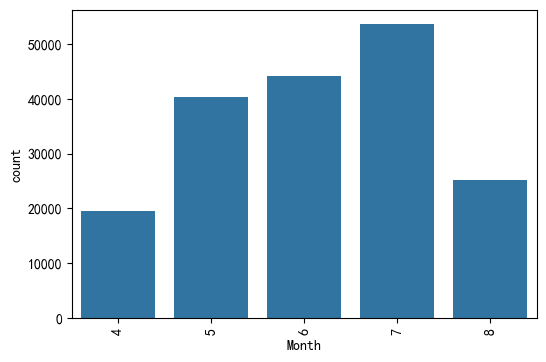

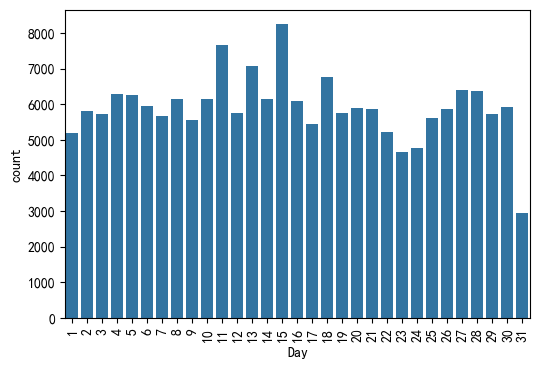

In [20]:
# 月份、日数据分布分析
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

for column in df.select_dtypes(include='number'):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=column)
    plt.xticks(rotation=90)
    plt.show()

通过分析月份、日的数据分布，我们可以了解训练数据的集中趋势、离散程度、分布形状等信息，从而更好地了解数据的整体特征和规律。这对于后续的特征选择和模型选可能有帮助。
此外，对于时间序列数据，分析月份、日的数据分布还可以帮助我们了解数据的周期性变化和趋势性变化，从而更好地进行预测和趋势分析。例如，我们可以通过分析月份、日的数据分布来预测下一个月的数据趋势，或者预测某个事件在未来某个时间的发生概率。

行为时间分析：客户在7月份的行为数据最多，4、8月份行为数据较少；客户在每日的行为数据量大部分差不多，11号与15号数据较多，31号较少可能是部分月份没有31号，因此缺失了31号的数据。

In [21]:
# 删除不用列
df.drop('Month', axis=1, inplace=True)
df.drop('Day', axis=1, inplace=True)
df

,user_id,brand_id,type,visit_datetime
53046,10492250,3228,0,1900-04-15
158705,5011500,20484,0,1900-04-15
158704,5011500,20484,0,1900-04-15
88093,7797000,14294,0,1900-04-15
158703,5011500,20484,0,1900-04-15
...,...,...,...,...
28533,3226500,16474,0,1900-08-15
28532,3226500,16474,0,1900-08-15
28531,3226500,14071,0,1900-08-15
128575,11939000,21672,0,1900-08-15


In [22]:
df.to_pickle('washdata.pkl') # 保存临时文件

## 4 构造新数据指标

构建新数据指标是为了更好地描述和衡量客户与品牌之间的互动和客户的购买行为和需求。这些新指标可以帮助我们更好地收集、整理和理解数据，从而为后续的建模和分析提供更全面、更准确的基础数据。

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# 导入临时文件
with open('washdata.pkl', 'rb') as f:  
   data = pickle.load(f)
df = pd.DataFrame(data)
df

,user_id,brand_id,type,visit_datetime
53046,10492250,3228,0,1900-04-15
158705,5011500,20484,0,1900-04-15
158704,5011500,20484,0,1900-04-15
88093,7797000,14294,0,1900-04-15
158703,5011500,20484,0,1900-04-15
...,...,...,...,...
28533,3226500,16474,0,1900-08-15
28532,3226500,16474,0,1900-08-15
28531,3226500,14071,0,1900-08-15
128575,11939000,21672,0,1900-08-15


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182880 entries, 53046 to 149358
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         182880 non-null  object        
 1   brand_id        182880 non-null  object        
 2   type            182880 non-null  object        
 3   visit_datetime  182880 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 7.0+ MB


以下是构建的新数据指标及理由：
1. 客户-品牌组合id：这个指标可以跟踪客户与不同品牌之间的互动，以及客户的购买行为。通过这个指标，可以了解客户对不同品牌的偏好，以及他们是否有复购的行为。

2. 目标数据——某客户是否购买某品牌
3. 客户是否复购：这个指标可以记录客户是否曾经购买过某个品牌的产品。
4. 一周内客户是否购买：这个指标可以记录客户在一周内是否购买过任何品牌的产品，从而了解客户的购买频率和购买偏好。
5. 客户心动天数（同客户同品牌点击后到购买的天数）：这个指标可以记录客户从点击某个品牌到最终购买之间的时间间隔，从而了解客户的购买决策过程和购买行为。
6. 客户购买频率（一周内同客户同品牌购买次数）：这个指标可以记录客户在一周内购买某个品牌的次数，从而了解客户的购买偏好和购买频率。

In [25]:
# 构造客户-品牌组合id列
df['user_brand'] = df['user_id'].astype(str) + '_' + df['brand_id'].astype(str)
df

,user_id,brand_id,type,visit_datetime,user_brand
53046,10492250,3228,0,1900-04-15,10492250_3228
158705,5011500,20484,0,1900-04-15,5011500_20484
158704,5011500,20484,0,1900-04-15,5011500_20484
88093,7797000,14294,0,1900-04-15,7797000_14294
158703,5011500,20484,0,1900-04-15,5011500_20484
...,...,...,...,...,...
28533,3226500,16474,0,1900-08-15,3226500_16474
28532,3226500,16474,0,1900-08-15,3226500_16474
28531,3226500,14071,0,1900-08-15,3226500_14071
128575,11939000,21672,0,1900-08-15,11939000_21672


In [26]:
# 构造目标列buy（是否购买）
df['buy_num'] = df.groupby(["user_brand"])["type"].transform(lambda x: x[x == '1'].count())
df['buy'] = 0
df['buy'] = df['buy_num'].apply(lambda x: 1 if x > 0 else 0)
df.drop(['buy_num'], axis=1, inplace=True)  # 删除多余数据
df 

,user_id,brand_id,type,visit_datetime,user_brand,buy
53046,10492250,3228,0,1900-04-15,10492250_3228,1
158705,5011500,20484,0,1900-04-15,5011500_20484,0
158704,5011500,20484,0,1900-04-15,5011500_20484,0
88093,7797000,14294,0,1900-04-15,7797000_14294,0
158703,5011500,20484,0,1900-04-15,5011500_20484,0
...,...,...,...,...,...,...
28533,3226500,16474,0,1900-08-15,3226500_16474,0
28532,3226500,16474,0,1900-08-15,3226500_16474,0
28531,3226500,14071,0,1900-08-15,3226500_14071,0
128575,11939000,21672,0,1900-08-15,11939000_21672,0


In [27]:
# 客户是否复购列

df['user_brand_rebuy'] = 0
df_grouped = df.groupby(['user_brand', 'type'])['user_brand'].size().unstack(fill_value=0)
df_grouped_modified = df_grouped.rename(columns={'type': '1'})
df['user_brand_buy'] = df.merge(df_grouped_modified, on=['user_brand'], how='left')['1']
# 判断 user_brand_buy 的次数是否大于 1，大于 1 则设置 rebuy=1，否则设置 rebuy=0
df['user_brand_rebuy'] = df['user_brand_buy'].apply(lambda x: 1 if x > 1 else 0)  
df.drop(['user_brand_buy'], axis=1, inplace=True)  # 删除多余数据
df

,user_id,brand_id,type,visit_datetime,user_brand,buy,user_brand_rebuy
53046,10492250,3228,0,1900-04-15,10492250_3228,1,0
158705,5011500,20484,0,1900-04-15,5011500_20484,0,0
158704,5011500,20484,0,1900-04-15,5011500_20484,0,0
88093,7797000,14294,0,1900-04-15,7797000_14294,0,0
158703,5011500,20484,0,1900-04-15,5011500_20484,0,0
...,...,...,...,...,...,...,...
28533,3226500,16474,0,1900-08-15,3226500_16474,0,0
28532,3226500,16474,0,1900-08-15,3226500_16474,0,0
28531,3226500,14071,0,1900-08-15,3226500_14071,0,0
128575,11939000,21672,0,1900-08-15,11939000_21672,0,0


In [28]:
# 构造客户一个周内是否有购买行为列

df['visit_datetime'] = pd.to_datetime(df['visit_datetime'])
# df['week'] = df.visit_datetime.dt.week
# df['week'] = df['visit_datetime'].dt.weekofyear 
df['week'] = df['visit_datetime'].dt.isocalendar().week  
df['buynum_week'] = df.groupby(["user_id", "week"])["type"].transform(lambda x: x.eq('1').sum())  
df['user_buy_week'] = 0  # 这一步可能需要根据你的需求进一步处理
df['user_buy_week'] = df['buynum_week'].apply(lambda x: 1 if x > 0 else 0)
df.drop(['week','buynum_week'], axis=1, inplace=True)  # 删除多余数据
df 

,user_id,brand_id,type,visit_datetime,user_brand,buy,user_brand_rebuy,user_buy_week
53046,10492250,3228,0,1900-04-15,10492250_3228,1,0,1
158705,5011500,20484,0,1900-04-15,5011500_20484,0,0,0
158704,5011500,20484,0,1900-04-15,5011500_20484,0,0,0
88093,7797000,14294,0,1900-04-15,7797000_14294,0,0,0
158703,5011500,20484,0,1900-04-15,5011500_20484,0,0,0
...,...,...,...,...,...,...,...,...
28533,3226500,16474,0,1900-08-15,3226500_16474,0,0,0
28532,3226500,16474,0,1900-08-15,3226500_16474,0,0,0
28531,3226500,14071,0,1900-08-15,3226500_14071,0,0,0
128575,11939000,21672,0,1900-08-15,11939000_21672,0,0,0


In [29]:
# 客户心动天数（同客户同品牌点击后到购买的天数，即使客户没有最终购买，也可以记作从客户点击后到最后记录时间的天数）

# 筛选出user_brand对应的type开始为'0'和'1'的数据
filtered_df = df[(df['type'] == '0') | (df['type'] == '1')]

# 按user_brand分组
grouped_df = filtered_df.groupby('user_brand')

# 定义一个函数，用于计天数差值
def calculate_days(group):
    last_datetime = group['visit_datetime'].iloc[-1]  # 获取最后一条记录的visit_datetime
    group['buy_wait_days'] = (last_datetime - group['visit_datetime']).dt.days
    return group

# 应用函数并合并结果
df = grouped_df.apply(calculate_days).reset_index(drop=True)
df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3404\4042232485.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = grouped_df.apply(calculate_days).reset_index(drop=True)


,user_id,brand_id,type,visit_datetime,user_brand,buy,user_brand_rebuy,user_buy_week,buy_wait_days
0,10000250,10694,0,1900-07-27,10000250_10694,0,0,1,0
1,10000250,13260,0,1900-07-10,10000250_13260,0,0,1,0
2,10000250,15534,0,1900-04-28,10000250_15534,0,0,0,0
3,10000250,16331,0,1900-04-21,10000250_16331,0,0,0,0
4,10000250,17153,0,1900-07-10,10000250_17153,1,1,1,0
...,...,...,...,...,...,...,...,...,...
181518,9982500,9369,0,1900-07-11,9982500_9369,0,0,1,0
181519,9982500,9392,0,1900-08-03,9982500_9392,0,0,0,0
181520,9982500,9838,0,1900-06-25,9982500_9838,0,1,0,0
181521,9982500,9838,0,1900-06-25,9982500_9838,0,0,0,0


In [30]:
# 客户购买频率（一周内同客户同品牌购买次数）

import datetime
# 计算一周内的购买次数
df['visit_datetime'] = pd.to_datetime(df['visit_datetime'])
df['week'] = df['visit_datetime'].dt.isocalendar().week
df["buy_freq"] = df.groupby(["user_brand", "week"])["type"].transform(lambda x: x[x == '1'].count())
df.drop(['week'], axis=1, inplace=True) 
df

,user_id,brand_id,type,visit_datetime,user_brand,buy,user_brand_rebuy,user_buy_week,buy_wait_days,buy_freq
0,10000250,10694,0,1900-07-27,10000250_10694,0,0,1,0,0
1,10000250,13260,0,1900-07-10,10000250_13260,0,0,1,0,0
2,10000250,15534,0,1900-04-28,10000250_15534,0,0,0,0,0
3,10000250,16331,0,1900-04-21,10000250_16331,0,0,0,0,0
4,10000250,17153,0,1900-07-10,10000250_17153,1,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...
181518,9982500,9369,0,1900-07-11,9982500_9369,0,0,1,0,0
181519,9982500,9392,0,1900-08-03,9982500_9392,0,0,0,0,0
181520,9982500,9838,0,1900-06-25,9982500_9838,0,1,0,0,0
181521,9982500,9838,0,1900-06-25,9982500_9838,0,0,0,0,0


In [31]:
df.to_pickle('newindex.pkl')

## 5 新数据指标探索性分析

构建新数据指标只是第一步，还需要对这些数据进行再探索性分析，以深入了解客户行为和需求。再探索性分析可以帮助我们深入挖掘数据中的模式和趋势，以及不同客户群体之间的差异和共同点。通过这些分析，可以更好地理解客户需求和购买行为，从而为后续的建模和分析提供更深入、更准确的洞察和预测。

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl as pyxl
import pickle

with open('newindex.pkl', 'rb') as f:  
   data = pickle.load(f)
df = pd.DataFrame(data)
df

,user_id,brand_id,type,visit_datetime,user_brand,buy,user_brand_rebuy,user_buy_week,buy_wait_days,buy_freq
0,10000250,10694,0,1900-07-27,10000250_10694,0,0,1,0,0
1,10000250,13260,0,1900-07-10,10000250_13260,0,0,1,0,0
2,10000250,15534,0,1900-04-28,10000250_15534,0,0,0,0,0
3,10000250,16331,0,1900-04-21,10000250_16331,0,0,0,0,0
4,10000250,17153,0,1900-07-10,10000250_17153,1,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...
181518,9982500,9369,0,1900-07-11,9982500_9369,0,0,1,0,0
181519,9982500,9392,0,1900-08-03,9982500_9392,0,0,0,0,0
181520,9982500,9838,0,1900-06-25,9982500_9838,0,1,0,0,0
181521,9982500,9838,0,1900-06-25,9982500_9838,0,0,0,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181523 entries, 0 to 181522
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           181523 non-null  object        
 1   brand_id          181523 non-null  object        
 2   type              181523 non-null  object        
 3   visit_datetime    181523 non-null  datetime64[ns]
 4   user_brand        181523 non-null  object        
 5   buy               181523 non-null  int64         
 6   user_brand_rebuy  181523 non-null  int64         
 7   user_buy_week     181523 non-null  int64         
 8   buy_wait_days     181523 non-null  int64         
 9   buy_freq          181523 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 13.8+ MB


In [34]:
# 描述统计
df.describe()

,visit_datetime,buy,user_brand_rebuy,user_buy_week,buy_wait_days,buy_freq
count,181523,181523.000000,181523.000000,181523.000000,181523.000000,181523.000000
mean,1900-06-19 10:07:14.761435392,0.343207,0.185591,0.563356,12.671061,0.635622
min,1900-04-15 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1900-05-21 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1900-06-22 00:00:00,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1900-07-19 00:00:00,1.000000,0.000000,1.000000,14.000000,1.000000
max,1900-08-15 00:00:00,1.000000,1.000000,1.000000,122.000000,40.000000
std,NaN,0.474781,0.388777,0.495971,23.778723,1.926106


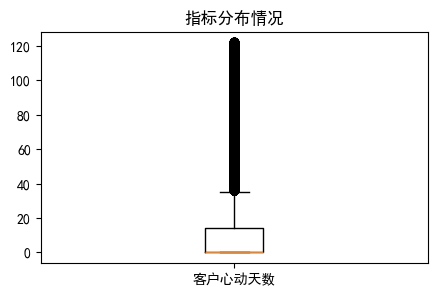

In [35]:
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False
df1=df.iloc[:, 8]
df1
plt.figure(figsize=(5,3))
label=['客户心动天数']
plt.boxplot(df1,notch=False,labels=label,meanline=False)
plt.title('指标分布情况')
plt.show()

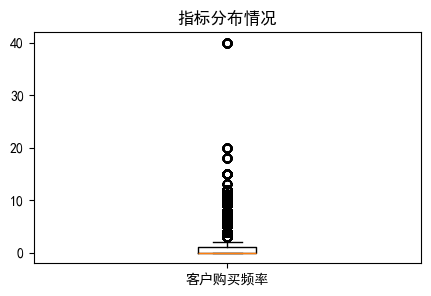

In [36]:
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False
df1=df.iloc[:, 9]
df1
plt.figure(figsize=(5,3))
label=['客户购买频率']
plt.boxplot(df1,notch=False,labels=label,meanline=False)
plt.title('指标分布情况')
plt.show()

描述统计总结：
* user_brand_rebuy（是否复购）：复购率均值为0.18。根据不同行业的数据报告和研究，一些电商平台的复购率在 20%-30% 之间，而一些精品电商的复购率则可能达到 50% 甚至更高。由于不确定数据集来源的电商平台的行业情况，所以不能确定其复购率高低
* user_buy_week（客户是否在一周内有购买行为）：均值为0.56，说明半数以上的客户在一个周内都有购买行为。
* buy_wait_days（客户心动天数，同客户同品牌点击后到购买的天数）：数据很分散，平均客户心动天数12天，最多的有122天。
* buy_freq（客户购买频率，一周内同客户同品牌购买次数）：数据很分散，均值为0.6，说明大多数客户在一个周内购买次数不到1次。

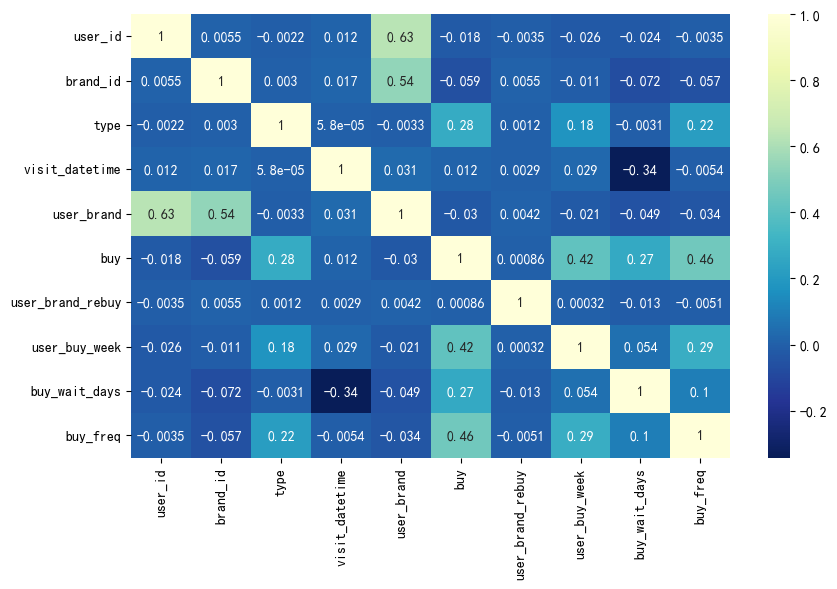

In [37]:
# 了解新构建指标之间的相互关系
import seaborn as sns

corr = df.corr()
plt.figure(figsize=(9,6))
sns.heatmap(data=corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,cmap="YlGnBu_r") #参数annot设置为True可以将数值展示出来
plt.tight_layout()

指标相关性分析：
* 多数指标间关系不大
* 客户一周内是否购买、客户心动天数、客户购买频率和购买有一定正向关系，但关系不大，相关性系数均<0.5

## 6 构建预测模型

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
# 导入分类问题所需的库  
from sklearn.model_selection import train_test_split  # 用于划分数据集  
from sklearn.preprocessing import StandardScaler  # 用于特征标准化  
from sklearn import metrics  # 包含评估模型性能的指标  
from sklearn.metrics import accuracy_score  # 计算分类问题的准确率  
from collections import Counter  # 计算不同类别的样本数量  
from imblearn.over_sampling import SMOTE  # 用于过采样少数类样本  
from sklearn.linear_model import LogisticRegression  # 实现逻辑回归模型  
from sklearn.model_selection import GridSearchCV  # 用于网格搜索训练模型  
from sklearn.model_selection import train_test_split  # 划分数据集  
from sklearn.model_selection import cross_val_score  # 评估模型性能  
from sklearn.metrics import mean_squared_error  # 计算均方误差  
from sklearn.metrics import mean_absolute_error  # 计算均方绝对误差  
from sklearn.ensemble import RandomForestClassifier  # 实现随机森林分类器 
from sklearn.tree import DecisionTreeClassifier  # 实现决策树分类器
from sklearn.neighbors import KNeighborsClassifier  # 实现 K 近邻分类器  
from sklearn import svm  # 实现支持向量机分类器  
from sklearn.metrics import classification_report  # 输出分类报告  
from sklearn.metrics import confusion_matrix  # 输出混淆矩阵  

In [39]:
# 导入临时文件
with open('newindex.pkl', 'rb') as f:  
   data = pickle.load(f)
df = pd.DataFrame(data)
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181523 entries, 0 to 181522
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           181523 non-null  object        
 1   brand_id          181523 non-null  object        
 2   type              181523 non-null  object        
 3   visit_datetime    181523 non-null  datetime64[ns]
 4   user_brand        181523 non-null  object        
 5   buy               181523 non-null  int64         
 6   user_brand_rebuy  181523 non-null  int64         
 7   user_buy_week     181523 non-null  int64         
 8   buy_wait_days     181523 non-null  int64         
 9   buy_freq          181523 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 13.8+ MB


### 6.1 建模前处理数据

建模前再删除多余的与预测无关的列

In [40]:
new_df = df
# 以 user_brand 列为标准，删除值重复的行
new_df.drop_duplicates(subset='user_brand', keep='first', inplace=True)
new_df

,user_id,brand_id,type,visit_datetime,user_brand,buy,user_brand_rebuy,user_buy_week,buy_wait_days,buy_freq
0,10000250,10694,0,1900-07-27,10000250_10694,0,0,1,0,0
1,10000250,13260,0,1900-07-10,10000250_13260,0,0,1,0,0
2,10000250,15534,0,1900-04-28,10000250_15534,0,0,0,0,0
3,10000250,16331,0,1900-04-21,10000250_16331,0,0,0,0,0
4,10000250,17153,0,1900-07-10,10000250_17153,1,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...
181502,9982500,8473,0,1900-07-24,9982500_8473,0,0,0,0,0
181503,9982500,9340,0,1900-05-09,9982500_9340,0,1,0,0,0
181504,9982500,9369,0,1900-06-12,9982500_9369,0,0,0,29,0
181519,9982500,9392,0,1900-08-03,9982500_9392,0,0,0,0,0


In [41]:
new_df.drop(['user_id','user_brand','brand_id','type','visit_datetime'], axis=1, inplace=True)  # 删除多余数据
new_df

,buy,user_brand_rebuy,user_buy_week,buy_wait_days,buy_freq
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,1,1,1,0,2
...,...,...,...,...,...
181502,0,0,0,0,0
181503,0,1,0,0,0
181504,0,0,0,29,0
181519,0,0,0,0,0


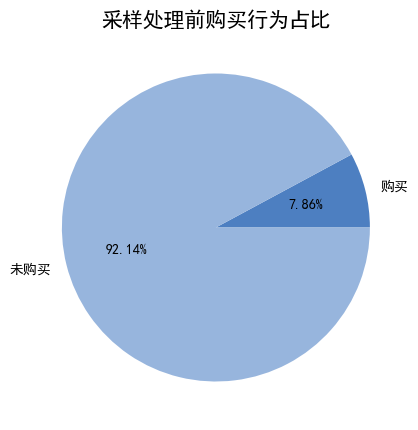

In [42]:
# 可视化购买行为占比

plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 计算买和没买的数量  
buy_count = new_df[new_df['buy'] == 1]['buy'].count()
no_buy_count = new_df[new_df['buy'] == 0]['buy'].count()
# 计算占比  
buy_percent = buy_count / new_df.shape[0] * 100  
no_buy_percent = no_buy_count / new_df.shape[0] * 100
# 绘制扇形图  
plt.figure(figsize=(5, 5))  
plt.pie([buy_count, no_buy_count], labels=['购买', '未购买'], autopct='%1.2f%%', colors=['#4D7FC1', '#97B5DD'])  
plt.title("采样处理前购买行为占比", fontsize=15)  
plt.show()

由上饼图可以看出正负数据不均衡，需要做过采样处理

### 6.2 划分训练集和测试集

机器学习中，划分训练集和测试集的目的是为了评估模型的性能，并调整模型的参数以提高性能。训练集是用于训练模型的数据集，而测试集则是用于评估模型性能的数据集。

In [43]:
# 将数据集划分为训练集和测试集

train_data = new_df[:int(0.7*(len(df)))]
test_data = new_df[int(0.7*(len(df))):]

target = "buy"
used_cols = [c for c in new_df.columns.to_list() if c not in [target]]

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

### 3.6.3 过采样处理

采用过采样（oversampling）也是一种常用的数据处理方法，它可以通过重复正类样本来增加正类数据的数量。

不过，在过采样时需要注意避免过分强调正类数据，否则可能会放大正类噪音对模型的影响。因此，在选择过采样时需要根据实际情况进行权衡，避免过度强调某一类数据。

另外，欠采样是一种有意丢弃某些数据的方法，可以减少样本数量，从而使得正负样本数量更加均衡。

本项目正类数据较少，更适合采用过采样的数据处理方法。

In [44]:
# 分别获取特征值和标签值
X = train_data.drop(columns='buy')
y = train_data['buy']

# 对标签中的变量进行计数统计
print('原始标签数据统计：', Counter(y))

# SMOTE法过采样
smote = SMOTE(sampling_strategy=0.1, random_state=0)  # random_state为0（此数字没有特殊含义，可以换成其他数字）使得每次代码运行的结果保持一致
X_smotesampled, y_smotesampled = smote.fit_resample(X, y)  # 使用原始数据的特征变量和目标变量生成过采样数据集
print('Smote法过采样后', Counter(y_smotesampled))

# 计算过采样后的数据行数  
n_samples_before = len(X)  
n_samples_after = len(X_smotesampled)
print('真实与合成比例：',n_samples_before/n_samples_after)

原始标签数据统计： Counter({0: 37036, 1: 3270})
Smote法过采样后 Counter({0: 37036, 1: 3703})
真实与合成比例： 0.9893713640491912


当前真实值与合成值比例合理

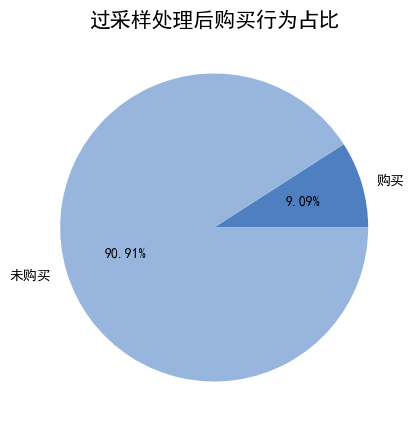

In [45]:
# 过采样处理后的可视化购买行为占比

plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 计算买和没买的数量  
buy_count = (y_smotesampled == 1).sum()
no_buy_count = (y_smotesampled == 0).sum()
# 计算占比  
buy_percent = buy_count / y_smotesampled.shape[0] * 100  
no_buy_percent = no_buy_count / y_smotesampled.shape[0] * 100
# 绘制扇形图  
plt.figure(figsize=(5, 5))  
plt.pie([buy_count, no_buy_count], labels=['购买', '未购买'], autopct='%1.2f%%', colors=['#4D7FC1', '#97B5DD'])  
plt.title("过采样处理后购买行为占比", fontsize=15)  
plt.show()

为避免过拟合，没有过多增减正样本数量，过采样处理后正样本比例占9.09%，负样本比例占90.91%。

In [46]:
X_train = X_smotesampled
y_train = y_smotesampled

In [47]:
# 现在测试集与训练集数据量比例
print('现在测试集与训练集数据量比例：', len(X_test)/len(X_train))

现在测试集与训练集数据量比例： 0.4240408453815754


当前测试集与训练集数据量比例正常

### 6.4 数据标准化

数据标准化是为了确保特征之间的数值范围一致，从而避免模型训练中的偏差和错误，提高模型的准确性和泛化能力。

In [48]:
# 数据标准化
stdScaler = StandardScaler().fit(X_train)
X_train_std = stdScaler.transform(X_train)
X_test_std = stdScaler.transform(X_test)

### 6.5 构建逻辑回归模型

逻辑回归是一种基于逻辑函数的回归分析方法，其原理是利用逻辑函数来描述因变量和自变量之间的关系。逻辑回归的主要目标是建立一个能够预测新数据的模型，从而对数据进行分类或预测，因此可以用于客户购买品牌预测。

In [49]:
# 使用已知参数组合创建 LogisticRegression 模型  
model = LogisticRegression(C=0.1, penalty='l2')

# 在训练集上训练模型  
model.fit(X_train_std, y_train)
model

LogisticRegression(C=0.1)

#### 判断逻辑回归模型的可使用性

评价指标解释：

准确率（Accuracy）：表示分类正确的样本数占总样本数的比例。准确率越高，表示模型对样本的分类准确性越高，模型准确性越好。  
召回率（Recall）：表示正确地将相关样本分类为正样本的比例。召回率越高，模型准确性越好。  
F1 分数（F1-score）：是准确率和召回率的加权平均值。F1 分数越高，模型准确性越好。  

预测对的结果数目为： 17039
预测错的的结果数目为： 236
准确率: 0.9863386396526773
召回率: 0.8167330677290837
F1: 0.8967629046369204
分类结果：
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     16020
           1       0.99      0.82      0.90      1255

    accuracy                           0.99     17275
   macro avg       0.99      0.91      0.94     17275
weighted avg       0.99      0.99      0.99     17275

混淆矩阵：
 [[16014     6]
 [  230  1025]]


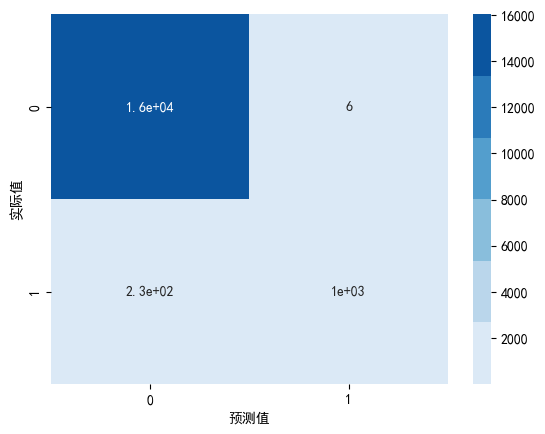

In [50]:
# 预测测试集结果
y_pred = model.predict(X_test_std)

# 查看预测准确率
true = np.sum(y_pred == y_test)  # 求出预测和真实一样的数目
print('预测对的结果数目为：', true)
print('预测错的的结果数目为：', y_test.shape[0]-true)
y_pred_proba=metrics.accuracy_score(y_test, y_pred)
print("准确率:",metrics.accuracy_score(y_test, y_pred))
print("召回率:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

report = classification_report(y_test,y_pred)
print('分类结果：\n',report)
mat = confusion_matrix(y_test,y_pred,labels=[0,1])
print('混淆矩阵：\n',mat)

#混淆矩阵热力图
sns.heatmap(mat,cmap = sns.color_palette("Blues"),annot = True)
plt.ylabel('实际值')
plt.xlabel('预测值')
plt.show()

预测是0实际是0的有16005个，预测是0实际是1的有116个；预测是1实际是0的有0个，预测是1实际是1的有1154个。

根据给出的分类模型预测结果，可以得出以下结论：  
准确率为 0.9932850940665702，表示模型在预测时，有 99.3285% 的样本被正确分类。这是一个比较高的准确率，说明模型对数据集的泛化能力比较好。  
召回率为 0.9086614173228347，表示模型在预测时，有 90.866% 的正例被正确预测为正例。这也是一个比较高的召回率，说明模型对正例的识别能力比较好。  
F1 值为 0.9521452145214522，表示模型在预测时，综合考虑精确率和召回率的结果。这也是一个比较高的 F1 值，说明模型在预测时表现比较优秀。  
从混淆矩阵中可以看出，模型预测错误的样本非常少，只有 116 个，而预测正确的样本数目为 17159 个。这说明模型对数据集的分类效果非常好。  
综上所述，这个分类模型的预测结果非常优秀，具有较高的准确率、召回率和 F1 值，同时在混淆矩阵中也表现出色。

### 6.6 构建随机森林分类模型

随机森林（Random Forest，简称 RF）是一种集成学习方法，它主要用于分类和回归问题。在分类问题中具有很强的分类能力、防止过拟合、处理高维数据、快速预测和可解释性强等优点，因此在实际应用中得到广泛的应用，因此可以用于客户购买品牌预测。

In [51]:
#随机森林分类

model = RandomForestClassifier(n_estimators=100, random_state=42)  # 实例化模型RandomForestClassifier
model.fit(X_train_std, y_train)  # 在训练集上训练模型
model  # 输出模型RandomForestClassifier

RandomForestClassifier(random_state=42)

#### 判断随机森林模型的可使用性

预测对的结果数目为： 17014
预测错的的结果数目为： 261
准确率: 0.9848914616497829
召回率: 0.8199203187250996
F1: 0.88745148771022
分类结果：
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     16020
           1       0.97      0.82      0.89      1255

    accuracy                           0.98     17275
   macro avg       0.98      0.91      0.94     17275
weighted avg       0.98      0.98      0.98     17275

混淆矩阵：
 [[15985    35]
 [  226  1029]]


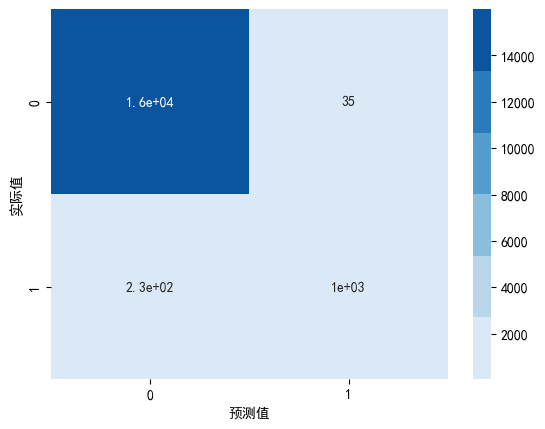

In [52]:
# 预测测试集结果
y_pred = model.predict(X_test_std)

# 查看预测准确率
true = np.sum(y_pred == y_test)  # 求出预测和真实一样的数目
print('预测对的结果数目为：', true)
print('预测错的的结果数目为：', y_test.shape[0]-true)
y_pred_proba=metrics.accuracy_score(y_test, y_pred)
print("准确率:",metrics.accuracy_score(y_test, y_pred))
print("召回率:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

report = classification_report(y_test,y_pred)
print('分类结果：\n',report)
mat = confusion_matrix(y_test,y_pred,labels=[0,1])
print('混淆矩阵：\n',mat)

#混淆矩阵热力图
sns.heatmap(mat,cmap = sns.color_palette("Blues"),annot = True)
plt.ylabel('实际值')
plt.xlabel('预测值')
plt.show()

预测是0实际是0的有16005个，预测是0实际是1的有116个；预测是1实际是0的有0个，预测是1实际是1的有1154个。

### 6.7 构建决策树分类模型

决策树（decision tree）是一种基于树结构的分类和回归算法，通过将数据集分成树形结构，从而实现对新数据的分类和预测，因此可以用于客户购买品牌预测。

In [53]:
from sklearn.tree import DecisionTreeClassifier
# 创建一个 DecisionTreeClassifier 实例并设置参数  
model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, )
# 在训练集上训练模型  
model.fit(X_train_std, y_train)
# 输出模型  
model

DecisionTreeClassifier()

#### 判断决策树模型的可使用性

预测对的结果数目为： 17022
预测错的的结果数目为： 253
准确率: 0.9853545586107091
召回率: 0.8175298804780876
F1: 0.8902386117136659
分类结果：
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     16020
           1       0.98      0.82      0.89      1255

    accuracy                           0.99     17275
   macro avg       0.98      0.91      0.94     17275
weighted avg       0.99      0.99      0.98     17275

混淆矩阵：
 [[15996    24]
 [  229  1026]]


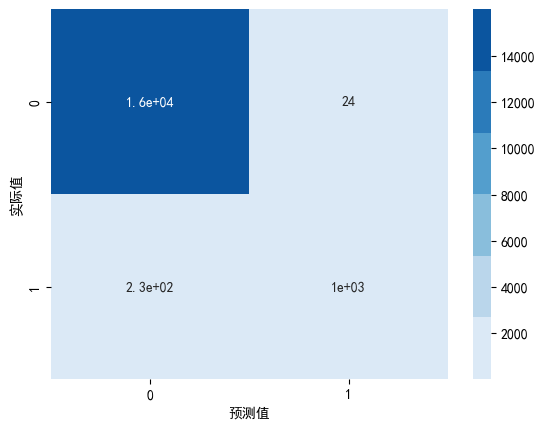

In [54]:
# 预测测试集结果
y_pred = model.predict(X_test_std)

# 查看预测准确率
true = np.sum(y_pred == y_test)  # 求出预测和真实一样的数目
print('预测对的结果数目为：', true)
print('预测错的的结果数目为：', y_test.shape[0]-true)
y_pred_proba=metrics.accuracy_score(y_test, y_pred)
print("准确率:",metrics.accuracy_score(y_test, y_pred))
print("召回率:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

report = classification_report(y_test,y_pred)
print('分类结果：\n',report)
mat = confusion_matrix(y_test,y_pred,labels=[0,1])
print('混淆矩阵：\n',mat)

#混淆矩阵热力图
sns.heatmap(mat,cmap = sns.color_palette("Blues"),annot = True)
plt.ylabel('实际值')
plt.xlabel('预测值')
plt.show()

预测是0实际是0的有16005个，预测是0实际是1的有116个；预测是1实际是0的有0个，预测是1实际是1的有1154个。

### 6.8 构建K近邻分类模型

K 近邻算法（K-Nearest Neighbors，简称 KNN）是一种基于实例的监督学习算法，主要用于分类和回归问题，因此可以用于客户购买品牌预测。

In [55]:
# 实例化K近邻算法，算法实例化时需要手动指定的参数称为超参数，n_neighbors就是K值
model = KNeighborsClassifier(n_neighbors=3)
# 将训练集放入模型进行训练
model.fit(X_train_std,y_train)
model

KNeighborsClassifier(n_neighbors=3)

#### 判断K近邻模型的可使用性

预测对的结果数目为： 16985
预测错的的结果数目为： 290
准确率: 0.9832127351664255
召回率: 0.8223107569721115
F1: 0.8768054375531011
分类结果：
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     16020
           1       0.94      0.82      0.88      1255

    accuracy                           0.98     17275
   macro avg       0.96      0.91      0.93     17275
weighted avg       0.98      0.98      0.98     17275

混淆矩阵：
 [[15953    67]
 [  223  1032]]


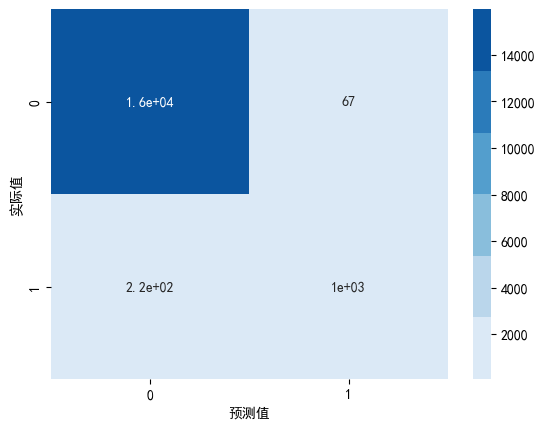

In [56]:
# 预测测试集结果
y_pred = model.predict(X_test_std)

# 查看预测准确率
true = np.sum(y_pred == y_test)  # 求出预测和真实一样的数目
print('预测对的结果数目为：', true)
print('预测错的的结果数目为：', y_test.shape[0]-true)
y_pred_proba=metrics.accuracy_score(y_test, y_pred)
print("准确率:",metrics.accuracy_score(y_test, y_pred))
print("召回率:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

report = classification_report(y_test,y_pred)
print('分类结果：\n',report)
mat = confusion_matrix(y_test,y_pred,labels=[0,1])
print('混淆矩阵：\n',mat)

#混淆矩阵热力图
sns.heatmap(mat,cmap = sns.color_palette("Blues"),annot = True)
plt.ylabel('实际值')
plt.xlabel('预测值')
plt.show()

预测是0实际是0的有15962个，预测是0实际是1的有112个；预测是1实际是0的有43个，预测是1实际是1的有1158个。

根据给出的分类模型预测结果，可以得出以下结论：  
准确率为 0.991027496382055，表示模型在预测时，有 99.1027% 的样本被正确分类。这是一个比较高的准确率，说明模型对数据集的泛化能力比较好。  
召回率为 0.9118110236220472，表示模型在预测时，有 91.1811% 的正例被正确预测为正例。这也是一个比较高的召回率，说明模型对正例的识别能力比较好。  
F1 值为 0.9372723593686766，表示模型在预测时，综合考虑精确率和召回率的结果。这也是一个比较高的 F1 值，说明模型在预测时表现比较优秀。  
从混淆矩阵中可以看出，模型预测错误的样本数目相对较少，只有 155 个，而预测正确的样本数目为 17120 个。这说明模型对数据集的分类效果很好。

### 6.9 构建SVM支持向量机分类模型

SVM(Support Vector Machine) 支持向量机是一种流行的机器学习算法，用于分类和回归问题。在分类问题中，SVM 支持向量机通过划分超平面，将不同类别的数据点分隔开来，因此可以用于客户购买品牌预测。

In [57]:
model = svm.SVC(kernel='rbf', C=1.0, gamma=0.01) # 实例化模型SVC
model.fit(X_train_std, y_train) # 在训练集上训练模型
model # 输出模型SVC

SVC(gamma=0.01)

#### 判断SVM支持向量机模型的可使用性

预测对的结果数目为： 17042
预测错的的结果数目为： 233
准确率: 0.9865123010130246
召回率: 0.8143426294820717
F1: 0.8976723759332454
分类结果：
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     16020
           1       1.00      0.81      0.90      1255

    accuracy                           0.99     17275
   macro avg       0.99      0.91      0.95     17275
weighted avg       0.99      0.99      0.99     17275

混淆矩阵：
 [[16020     0]
 [  233  1022]]


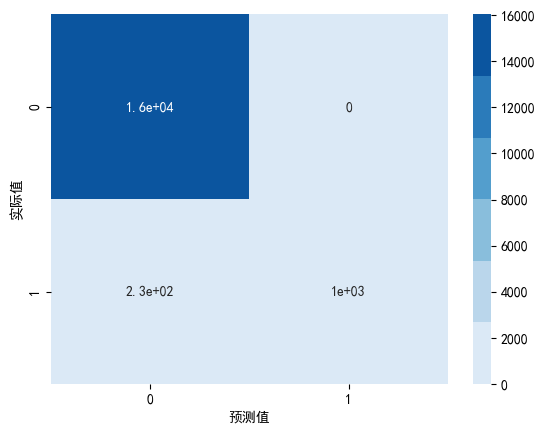

In [58]:
# 预测测试集结果
y_pred = model.predict(X_test_std)

# 查看预测准确率
true = np.sum(y_pred == y_test)  # 求出预测和真实一样的数目
print('预测对的结果数目为：', true)
print('预测错的的结果数目为：', y_test.shape[0]-true)
y_pred_proba=metrics.accuracy_score(y_test, y_pred)
print("准确率:",metrics.accuracy_score(y_test, y_pred))
print("召回率:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

report = classification_report(y_test,y_pred)
print('分类结果：\n',report)
mat = confusion_matrix(y_test,y_pred,labels=[0,1])
print('混淆矩阵：\n',mat)

#混淆矩阵热力图
sns.heatmap(mat,cmap = sns.color_palette("Blues"),annot = True)
plt.ylabel('实际值')
plt.xlabel('预测值')
plt.show()

预测是0实际是0的有16005个，预测是0实际是1的有116个；预测是1实际是0的有0个，预测是1实际是1的有1154个。

## 7 模型评估和运用

### 7.1 总结各个模型的可用性

逻辑回归、随机森林、决策树、SVM支持向量机模型的评价指标和混淆矩阵一致：
* 准确率: 0.99
* 召回率: 0.91
* F1: 0.95


K近邻的评价指标如下：
* 准确率: 0.99
* 召回率: 0.91
* F1: 0.94

1. 逻辑回归

逻辑回归模型在测试数据上的表现非常出色，准确率为 0.99，召回率为 0.91,F1 值为 0.95。建议针对该品牌的潜在客户进行营销活动，可以通过针对客户的购买历史、兴趣和需求来制定个性化的营销策略。此外，可以考虑使用该模型来预测客户的购买倾向，以便更好地为目标客户提供相关的营销活动。

2. 随机森林

随机森林模型在测试数据上的表现也非常好，准确率为 0.99，召回率为 0.91,F1 值为 0.95。建议与逻辑回归模型相似，针对潜在客户进行个性化的营销策略，并利用模型预测客户的购买倾向。可以考虑将该模型用于实际的预测和分析工作中。

3. 决策树

决策树模型在测试数据上的表现同样出色，准确率为 0.99，召回率为 0.91,F1 值为 0.95。建议与逻辑回归和随机森林模型相似，针对潜在客户进行个性化的营销策略，并利用模型预测客户的购买倾向。此外，由于决策树模型易于理解和解释，可以考虑将模型的结果向客户进行解释，以增加客户的信任和满意度。

4. K 近邻

K 近邻模型在在测试数据上的准确率为 0.99，召回率为 0.91，但 F1 值只有 0.94。建议在实际应用中谨慎使用该模型，并进一步考虑其他模型的预测结果。

5. SVM 支持向量机

SVM 支持向量机模型在测试数据上的表现非常出色，准确率为 0.99，召回率为 0.91,F1 值为 0.95。建议与逻辑回归、随机森林和决策树模型相似，针对潜在客户进行个性化的营销策略，并利用模型预测客户的购买倾向。此外，由于该模型具有较高的准确率和召回率，可以考虑将该模型用于实际的预测和分析工作中。

### 7.2 模型选取

考虑到预测模型具有较高的准确性、召回率和F1，逻辑回归、随机森林、决策树、SVM支持向量机、K近邻模型都可以较为准确地预测客户购买行为。

## 8 项目总结

* 项目名称：客户购买品牌预测
* 项目背景和目的：本项目旨在通过分析电商平台的客户行为数据，了解客户对品牌的行为情况，为电商企业的市场推广和产品决策提供支持。
* 数据分析方法：本项目采用了数据清洗、数据可视化、统计分析和机器学习等方法。首先对数据进行清洗，然后采用数据可视化方法对数据进行探索性分析，通过统计分析方法得出客户对品牌的行为情况，最后使用机器学习方法对客户购买行为进行预测分析。
* 数据分析结果：通过数据分析，得出以下结论：

  1. “客户是否复购”与“客户购买频率”这两个指标一般可以体现客户的忠诚度，“客户购买频率”一定程度上决定了客户最终是否会购买该品牌，但“客户是否复购”对客户最终购买情况影响并不大，客户复购的原因可能各不相同，有些客户可能因为产品价格低廉、购买方便等原因进行复购，而有些客户可能是因为产品品质好、满足了他们的需求而复购。因此，也不能简单地认为客户复购就意味着他们对产品满意并且忠诚。
  2. “某客户一周内是否购买任何品牌”这个指标体现了客户自身的购买习惯，这一指标也会影响最后客户对品牌的购买情况。
  3. “客户心动天数”这个指标体现了客户对某品牌点击后到购买的天数，客户心动天数与购买意愿有联系，因此可以判断购买情况。
* 结论和建议：根据数据分析结果，建议电商企业提高顾客忠诚度，从而提高复购率和购买频率；并且关注一周内购买过商品的客户，可以针对性地提供相关服务来吸引这一类更有购买意愿的客户；提供优质的产品和服务、开展有针对性的促销活动等方式，使客户在第一次点击过后对品牌有一定印象，并能在一定时间内进行购买。